# <center> Проект: Анализ рейтингов отелей

# Постановка задачи

Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

Ответить на эти вопросы помогут данные, которые содержат следующую информацию:
* hotel_address — адрес отеля;
* review_date — дата, когда рецензент разместил соответствующий отзыв;
* average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* hotel_name — название отеля;
* reviewer_nationality — страна рецензента;
* negative_review — отрицательный отзыв, который рецензент дал отелю;
* review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
* positive_review — положительный отзыв, который рецензент дал отелю;
* review_total_positive_word_counts — общее количество слов в положительном отзыве;
* reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
* total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
* total_number_of_reviews — общее количество действительных отзывов об отеле;
* tags — теги, которые рецензент дал отелю;
* days_since_review — количество дней между датой проверки и датой очистки;
* additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных * оценок без проверки.
* lat — географическая широта отеля;
* lng — географическая долгота отеля.


Источник датасета: ["[SF-DST] Booking reviews" (kaggle.com)](https://www.kaggle.com/competitions/sf-booking/overview)

# Загрузка данных

In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# для нормализации, стандартизации
from sklearn import preprocessing

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [120]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [121]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [122]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [123]:
df_train.head(2)

hotel_address  \
0  Stratton Street Mayfair Westminster Borough Lo...   
1  130 134 Southampton Row Camden London WC1B 5AF...   

   additional_number_of_scoring review_date  average_score  \
0                           581   2/19/2016            8.4   
1                           299   1/12/2017            8.3   

                        hotel_name reviewer_nationality  negative_review  \
0               The May Fair Hotel      United Kingdom          Leaving    
1  Mercure London Bloomsbury Hotel      United Kingdom    poor breakfast   

   review_total_negative_word_counts  total_number_of_reviews  \
0                                  3                     1994   
1                                  3                     1361   

       positive_review  review_total_positive_word_counts  \
0   Staff were amazing                                  4   
1             location                                  2   

   total_number_of_reviews_reviewer_has_given  reviewer_score  \
0                                           7            10.0   
1                                          14             6.3   

                                                tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Studio Suite ...           531 day   
1  [' Business trip ', ' Couple ', ' Standard Dou...           203 day   

         lat       lng  
0  51.507894 -0.143671  
1  51.521009 -0.123097

In [124]:
df_test.head(2)

hotel_address  \
0                 Via Senigallia 6 20161 Milan Italy   
1  Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...   

   additional_number_of_scoring review_date  average_score         hotel_name  \
0                           904   7/21/2017            8.1     Hotel Da Vinci   
1                           612  12/12/2016            8.6  Urban Lodge Hotel   

  reviewer_nationality                                    negative_review  \
0      United Kingdom    Would have appreciated a shop in the hotel th...   
1             Belgium         No tissue paper box was present at the room   

   review_total_negative_word_counts  total_number_of_reviews  \
0                                 52                    16670   
1                                 10                     5018   

                                     positive_review  \
0   Hotel was great clean friendly staff free bre...   
1                                        No Positive   

   review_total_positive_word_counts  \
0                                 62   
1                                  0   

   total_number_of_reviews_reviewer_has_given  \
0                                           1   
1                                           7   

                                                tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Double Room '...           13 days   
1  [' Leisure trip ', ' Group ', ' Triple Room ',...           234 day   

         lat       lng  
0  45.533137  9.171102  
1  52.385649  4.834443

In [125]:
sample_submission.head(2)

reviewer_score      id
0               1  488440
1              10  274649

# Исследование структуры данных

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [127]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [128]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [129]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

# объединяем
data = pd.concat(
    [df_test, df_train], 
    axis=0,          # Объединение по вертикали
    sort=False,      # Сохраняем порядок столбцов
    ignore_index=True
).reset_index(drop=True)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [131]:
# основная статистическая информация о столбцах
display(data.describe(include='all'))

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


hotel_address  \
count                                              515738   
unique                                               1493   
top     163 Marsh Wall Docklands Tower Hamlets London ...   
freq                                                 4789   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

        additional_number_of_scoring review_date  average_score  \
count                  515738.000000      515738  515738.000000   
unique                           NaN         731            NaN   
top                              NaN    8/2/2017            NaN   
freq                             NaN        2585            NaN   
mean                      498.081836         NaN       8.397487   
std                       500.538467         NaN       0.548048   
min                         1.000000         NaN       5.200000   
25%                       169.000000         NaN       8.100000   
50%                       341.000000         NaN       8.400000   
75%                       660.000000         NaN       8.800000   
max                      2682.000000         NaN       9.800000   

                                        hotel_name reviewer_nationality  \
count                                       515738               515738   
unique                                        1492                  227   
top     Britannia International Hotel Canary Wharf      United Kingdom    
freq                                          4789               245246   
mean                                           NaN                  NaN   
std                                            NaN                  NaN   
min                                            NaN                  NaN   
25%                                            NaN                  NaN   
50%                                            NaN                  NaN   
75%                                            NaN                  NaN   
max                                            NaN                  NaN   

       negative_review  review_total_negative_word_counts  \
count           515738                      515738.000000   
unique          330011                                NaN   
top        No Negative                                NaN   
freq            127890                                NaN   
mean               NaN                          18.539450   
std                NaN                          29.690831   
min                NaN                           0.000000   
25%                NaN                           2.000000   
50%                NaN                           9.000000   
75%                NaN                          23.000000   
max                NaN                         408.000000   

        total_number_of_reviews positive_review  \
count             515738.000000          515738   
unique                      NaN          412601   
top                         NaN     No Positive   
freq                        NaN           35946   
mean                2743.743944             NaN   
std                 2317.464868             NaN   
min                   43.000000             NaN   
25%                 1161.000000             NaN   
50%                 2134.000000             NaN   
75%                 3613.000000             NaN   
max                16670.000000             NaN   

        review_total_positive_word_counts  \
count                       515738.000000   
unique                                NaN   
top                                   NaN   
freq                                  NaN   
mean                            17

In [132]:
# количество уникальных значений по столбцам
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1473
lng                                             1473
sample                                             2
reviewer_score                                    38
dtype: int64

Ознакомимся с информацией из столбца с тегами.

In [133]:
tag_list = data['tags'].values.tolist() # столбец приводим к формату списка
tags = list() # создаем пустой список
for sublist in tag_list:
    sublist = sublist.replace("'", '')
    sublist = sublist.replace('[', '')
    sublist = sublist.replace(']', '')
    sublist = sublist.replace('  ', ' ')
    sublist = sublist.split(',')
    tags.extend(sublist)
        
cnt = Counter(tags)
cnt.most_common(3) # топ-3 самых повторяемых тега

[(' Leisure trip ', 417778),
 (' Submitted from a mobile device ', 307640),
 (' Couple ', 252294)]

In [134]:
# преобразование счетчика в словарь
tag_dict = dict(cnt) 

# преобразование словаря в DataFrame
tag_df = pd.DataFrame(list(tag_dict.items()), columns=['tag', 'count'])
 
# вывод DataFrame
display(tag_df.sort_values(by='count', ascending=False).head(50)) #сортировка по убыванию количества повторений

tag   count
0                       Leisure trip   417778
10    Submitted from a mobile device   307640
1                             Couple   252294
6                     Stayed 1 night   193645
3                    Stayed 2 nights   133937
8                      Solo traveler   108545
16                   Stayed 3 nights    95821
7                      Business trip    82939
4                              Group    65392
31        Family with young children    61015
21                   Stayed 4 nights    47817
2                        Double Room    35207
28              Standard Double Room    32248
19              Superior Double Room    31393
36        Family with older children    26349
80                Deluxe Double Room    24823
17               Double or Twin Room    22393
30                   Stayed 5 nights    20845
13      Standard Double or Twin Room    17483
53               Classic Double Room    16989
41      Superior Double or Twin Room    13570
54                           2 rooms    12393
40                   Stayed 6 nights     9776
37                Standard Twin Room     9745
73                       Single Room     9670
9                          Twin Room     8321
25                   Stayed 7 nights     7399
50             Executive Double Room     6425
12       Classic Double or Twin Room     6107
57                Superior Twin Room     6064
29        Deluxe Double or Twin Room     5998
34                  Club Double Room     5908
14                        Queen Room     5472
141                 Deluxe King Room     5357
45               Superior Queen Room     4898
26              Standard Single Room     4615
23                      Junior Suite     4559
5                        Triple Room     4493
155                    Superior Room     4417
35                      Classic Room     4416
22                Superior King Room     4248
76                     Standard Room     4205
44                       Deluxe Room     3974
135              Standard Queen Room     3533
47                 Double Guest Room     3437
81                Deluxe Single Room     3283
52                 Small Double Room     3187
107                 Queen Guest Room     3125
115                 Deluxe Twin Room     3083
33                 Basic Double Room     2851

# Преобразование данных

## Пропущенные значения

In [135]:
# подсчет пропущенных значений
data.isnull().sum()

hotel_address                                    0
additional_number_of_scoring                     0
review_date                                      0
average_score                                    0
hotel_name                                       0
reviewer_nationality                             0
negative_review                                  0
review_total_negative_word_counts                0
total_number_of_reviews                          0
positive_review                                  0
review_total_positive_word_counts                0
total_number_of_reviews_reviewer_has_given       0
tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
sample                                           0
reviewer_score                                   0
dtype: int64

Пропущенные значения содержатся только в столбцах с координатами отелей. Так как в дальнейшем эти признаки не будут подвергаться преобразованиям, удалим их.

In [136]:
# удаление столбцов с координатами
data = data.drop(['lat', 'lng'], axis=1)

## Создание новых признаков

Из столбца с датой извлечем информацию о времени года, год.

In [137]:
# приведение к формату даты
data['review_date'] = pd.to_datetime(data['review_date'])

# выделим месяц из даты
data['month'] = pd.DatetimeIndex(data['review_date']).month

# создадим новый признак с сезоном
def season_func(month):
    """Определяет сезон по номеру месяца

    Args:
        month (_int_): номер месяца

    Returns:
        _object_: сезон
    """
    #словарь для определения сезона
    seasons = {'Winter': (1, 2, 12),
           'Sping': (3, 4, 5),
           'Summer': (6, 7, 8),
           'Autumn': (9, 10, 11)} 

    for key in seasons.keys():
        if month in seasons[key]:
            return key

data['season'] = data['month'].apply(season_func) #создание нового признака с применением функции

In [138]:
# выделим год из даты
data['year'] = pd.DatetimeIndex(data['review_date']).year

Из столбца с адресом отеля выделим страну.

In [139]:
def country_func(arg):
    """Определяет страну

    Args:
        arg (_object_): запись об адресе

    Returns:
        _object_: страна
    """
    
    address = arg.split(' ') #разделение по пробелу слов из записи
    country = address[-1]
    if country == 'Kingdom':
        country = address[-2] + ' ' + address[-1]
    return country

data['country'] = data['hotel_address'].apply(country_func) #создание нового признака с применением функции

Проверим, какие страны чаще встречаются среди отелей и постояльцев.

In [140]:
display(data['country'].value_counts()) # страна отеля

country
United Kingdom    262301
Spain              60149
France             59928
Netherlands        57214
Austria            38939
Italy              37207
Name: count, dtype: int64

In [141]:
display(data['reviewer_nationality'].value_counts()) # страна рецензента

reviewer_nationality
United Kingdom               245246
United States of America      35437
Australia                     21686
Ireland                       14827
United Arab Emirates          10235
                              ...  
Comoros                           1
Anguilla                          1
Tuvalu                            1
Cape Verde                        1
Palau                             1
Name: count, Length: 227, dtype: int64

Создадим новый признак, в котором будет указано, является ли резидент иностранцем.

In [142]:
# удаление пробелов в начале и конце записи о национальности резидента
data['reviewer_nationality'] = data['reviewer_nationality'].apply(lambda x: x[1:-1] if x[0]==' ' else x)

In [143]:
# создание булевого прзнака "foreigner"
def foreigner_func(hotel, reviewer):
    """Определяет, является ли постоялец иностранцем

    Args:
        hotel (_object_): запись о стране, в которой расположен отель
        reviewer (_object_): запись о национальности резидента

    Returns:
        _boolean_: иностранец?
    """
    
    if hotel != reviewer:
        return 1
    else: return 0



#создание нового признака с применением функции
data['foreigner'] = data.apply(lambda x: foreigner_func(x['country'], x['reviewer_nationality']), axis=1)
data['foreigner'] = data['foreigner'].astype(bool)

Извлечем информацию из столбца с тегами.

In [144]:
# определим тип поездки

def tag_trip_func(arg):
    """Определяет тип поездки

    Args:
        arg (_object_): запись с тегами

    Returns:
        _object_: тип поездки
    """
    
    if 'Leisure trip' in arg:
        return 'LT'
    elif 'Business trip' in arg:
        return 'BT'
    else: return 'Other'

data['trip'] = data['tags'].apply(tag_trip_func) #создание нового признака с применением функции

In [145]:
# определим количество ночей

def tag_nights_func(arg):
    """Определяет количество проведенных ночей

    Args:
        arg (_object_): запись с тегами

    Returns:
        _int_: количество ночей
    """
    
    l = arg.split(' ') #разделение по пробелу слов из записи
    for i, elem in enumerate(l): 
        if elem == 'Stayed':
            return l[i+1]
        

data['nights'] = data['tags'].apply(tag_nights_func) #создание нового признака с применением функции

# приведем столбец к числовому типу данных
data['nights'] = data['nights'].astype(str)
data['nights'] = data['nights'].apply(lambda x: x.replace('None', '0'))
data['nights'] = data['nights'].astype(int)

In [146]:
# определим количество резидентов и степень родства

def tag_resnum_func(arg):
    """Определяет количество постояльцев

    Args:
        arg (_object_): запись с тегами

    Returns:
        _int64_: порядковая категория
    """
    
    if 'Solo traveler' in arg:
        return 'solo'
    elif 'Couple' in arg:
        return 'couple'
    elif 'Family' in arg:
        return 'family'
    elif 'friends' in arg:
        return 'friends'
    elif 'Group' in arg:
        return 'group'
    else: return 'other'

data['residents'] = data['tags'].apply(tag_resnum_func) #создание нового признака с применением функции

In [147]:
# уровень комфорта

def tag_roomtype_func(arg):
    """Присваивает категорию комфорта

    Args:
        arg (_object_): запись с тегами

    Returns:
        _int64_: порядковая категория
    """
    
    if 'Queen' in arg or 'King' in arg:
        return 1
    elif 'Deluxe' in arg or 'Superior' in arg or 'Executive' in arg:
        return 2
    elif 'Standard' in arg or 'Classic' in arg:
        return 3
    else: return 4

data['roomtype'] = data['tags'].apply(tag_roomtype_func) #создание нового признака с применением функции

In [148]:
# создание булевого прзнака "sbmt_mob_dev"
def sbmt_mob_dev_func(arg):
    """Определяет, был ли отправлен отзыв с мобильного устройства

    Args:
        arg (_object_): запись с тегами

    Returns:
        _boolean_: отзыв отправлен с мобильного устройства?
    """
    
    if 'Submitted from a mobile device' in arg:
        return 1
    else: return 0



#создание нового признака с применением функции
data['sbmt_mob_dev'] = data['tags'].apply(sbmt_mob_dev_func)
data['sbmt_mob_dev'] = data['sbmt_mob_dev'].astype(bool)

In [149]:
# определим количество комнат

def room_num_func(arg):
    """Определяет количество комнат

    Args:
        arg (_object_): запись с тегами

    Returns:
        _int64_: порядковая категория
    """
    
    if 'Quadruple' in arg:
        return 4
    elif ('Double' in arg) or ('Twin' in arg) or ('2 rooms' in arg):
        return 2
    elif 'Triple' in arg:
        return 3
    else: return 1

data['room_num'] = data['tags'].apply(room_num_func) #создание нового признака с применением функции

In [150]:
# создадим признак, показывающий процент оценок без отзыва из общего количества отзывов.
data['scoring_share'] = (data['additional_number_of_scoring']/(data['total_number_of_reviews'] + 
                                                               data['additional_number_of_scoring'])*100).round(2)

Проанализируем положительные и отрицательные отзывы и выведем среднюю оценку.

In [151]:
# загружаем анализатор
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [152]:
# функция выведения среднего балла на основании отзыва
def sent_score(arg):
    """Определяет оценку по комментарию

    Args:
        arg (_object_): запись с отзывом

    Returns:
        _int64_: средний балл
    """
    
    score = sent_analyzer.polarity_scores(arg)
    return score['compound']
    
    
data['sentiment'] = data['negative_review'] + ' ' + data['positive_review'] #вспомогательный столбец с положительным и отрицательным отзывами
data['sent_score'] = data['sentiment'].apply(sent_score) #создание нового признака с применением функции

In [153]:
# приведем столбец 'days_since_review' к числовому типу данных
data['days_since_review'] = data['days_since_review'].apply(lambda x: x.replace(' day', ''))
data['days_since_review'] = data['days_since_review'].apply(lambda x: x.replace('s', ''))
data['days_since_review'] = data['days_since_review'].astype(int)

In [154]:
# удалим столбцы, которые не будут участвовать в анализе данных
data = data.drop(['review_date', 'month'], axis=1)
data = data.drop(['hotel_address'], axis=1)
data = data.drop(['tags', 'sentiment'], axis=1)
data = data.drop(['negative_review', 'positive_review'], axis=1)

# Преобразование признаков

In [155]:
data.info() # выведем информацию о получившихся признаках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   hotel_name                                  515738 non-null  object 
 3   reviewer_nationality                        515738 non-null  object 
 4   review_total_negative_word_counts           515738 non-null  int64  
 5   total_number_of_reviews                     515738 non-null  int64  
 6   review_total_positive_word_counts           515738 non-null  int64  
 7   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 8   days_since_review                           515738 non-null  int64  
 9   sample                                      515738 non-null  int64  
 

## Кодирование категориальных признаков

In [156]:
# импортируем библиотеку для работы с кодировщиками
import category_encoders as ce 

Кодирование порядкового категориального признака "year" простой заменой значений.

In [157]:
# создаем словарь значений столбца 'year'
mapping = {2015: 1, 2016: 2, 2017: 3}
# производим замену значений
data['year'] = data['year'].replace(mapping)

Кодирование номинальных категориальных признаков (до 15 различных позиций) c использованием кодировщика OneHotEncoder:
* 'season'
* 'country'
* 'trip'
* 'residents'
* 'roomtype'

In [158]:
# применяем трансформацию к столбцам
data = pd.get_dummies(data, columns=['season', 'country', 'trip', 'residents', 'roomtype'])

Кодирование номинальных категориальных признаков (более 15 позиций) c использованием кодировщика BinaryEncoder:
* 'hotel_name'
* 'reviewer_nationality'

In [159]:
# указываем столбец для кодирования
bin_encoder = ce.BinaryEncoder(cols=['hotel_name'])
# применяем трансформацию к столбцу
type_bin = bin_encoder.fit_transform(data['hotel_name'])
# добавляем результат к исходному DataFrame
data = pd.concat([data, type_bin], axis=1)

In [160]:
# указываем столбец для кодирования
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality'])
# применяем трансформацию к столбцу
type_bin = bin_encoder.fit_transform(data['reviewer_nationality'])
# добавляем результат к исходному DataFrame
data = pd.concat([data, type_bin], axis=1)

In [161]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 57 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   days_since_review                           515738 non-null  int64  
 7   sample                                      515738 non-null  int64  
 8   reviewer_score                              515738 non-null  float64
 9   year                                        515738 non-null  int32  
 

## Нормализация и cтандартизация

In [163]:
# Разделим признаки на числовые и категориальные.
num_cols = ['additional_number_of_scoring', 'review_total_negative_word_counts', 'total_number_of_reviews', 
             'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given', 'days_since_review', 
             'nights', 'scoring_share', 'sent_score', 'average_score',]

cat_cols = ['year', 'foreigner', 'sbmt_mob_dev', 'room_num', 'season_Autumn', 
            'season_Sping', 'season_Summer', 'season_Winter', 'country_Austria', 'country_France', 'country_Italy', 
            'country_Netherlands', 'country_Spain', 'country_United Kingdom', 'trip_BT', 'trip_LT', 'trip_Other', 
            'residents_couple', 'residents_family', 'residents_friends', 'residents_group', 'residents_solo', 
            'hotel_name_0', 'hotel_name_1', 'hotel_name_2', 'hotel_name_3', 'hotel_name_4', 'hotel_name_5', 
            'hotel_name_6', 'hotel_name_7', 'hotel_name_8', 'hotel_name_9', 'hotel_name_10', 'reviewer_nationality_0', 
            'reviewer_nationality_1', 'reviewer_nationality_2', 'reviewer_nationality_3', 'reviewer_nationality_4', 
            'reviewer_nationality_5', 'reviewer_nationality_6', 'reviewer_nationality_7', 
            'roomtype_1', 'roomtype_2', 'roomtype_3', 'roomtype_4']

Построим график попарных соотношений, чтобы предварительно оценить следующие параметры:
* Насколько распределение признаков близко к нормальному. 
* Сила связи признаков.
* Характер связи признаков (положительная или отрицательная).

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

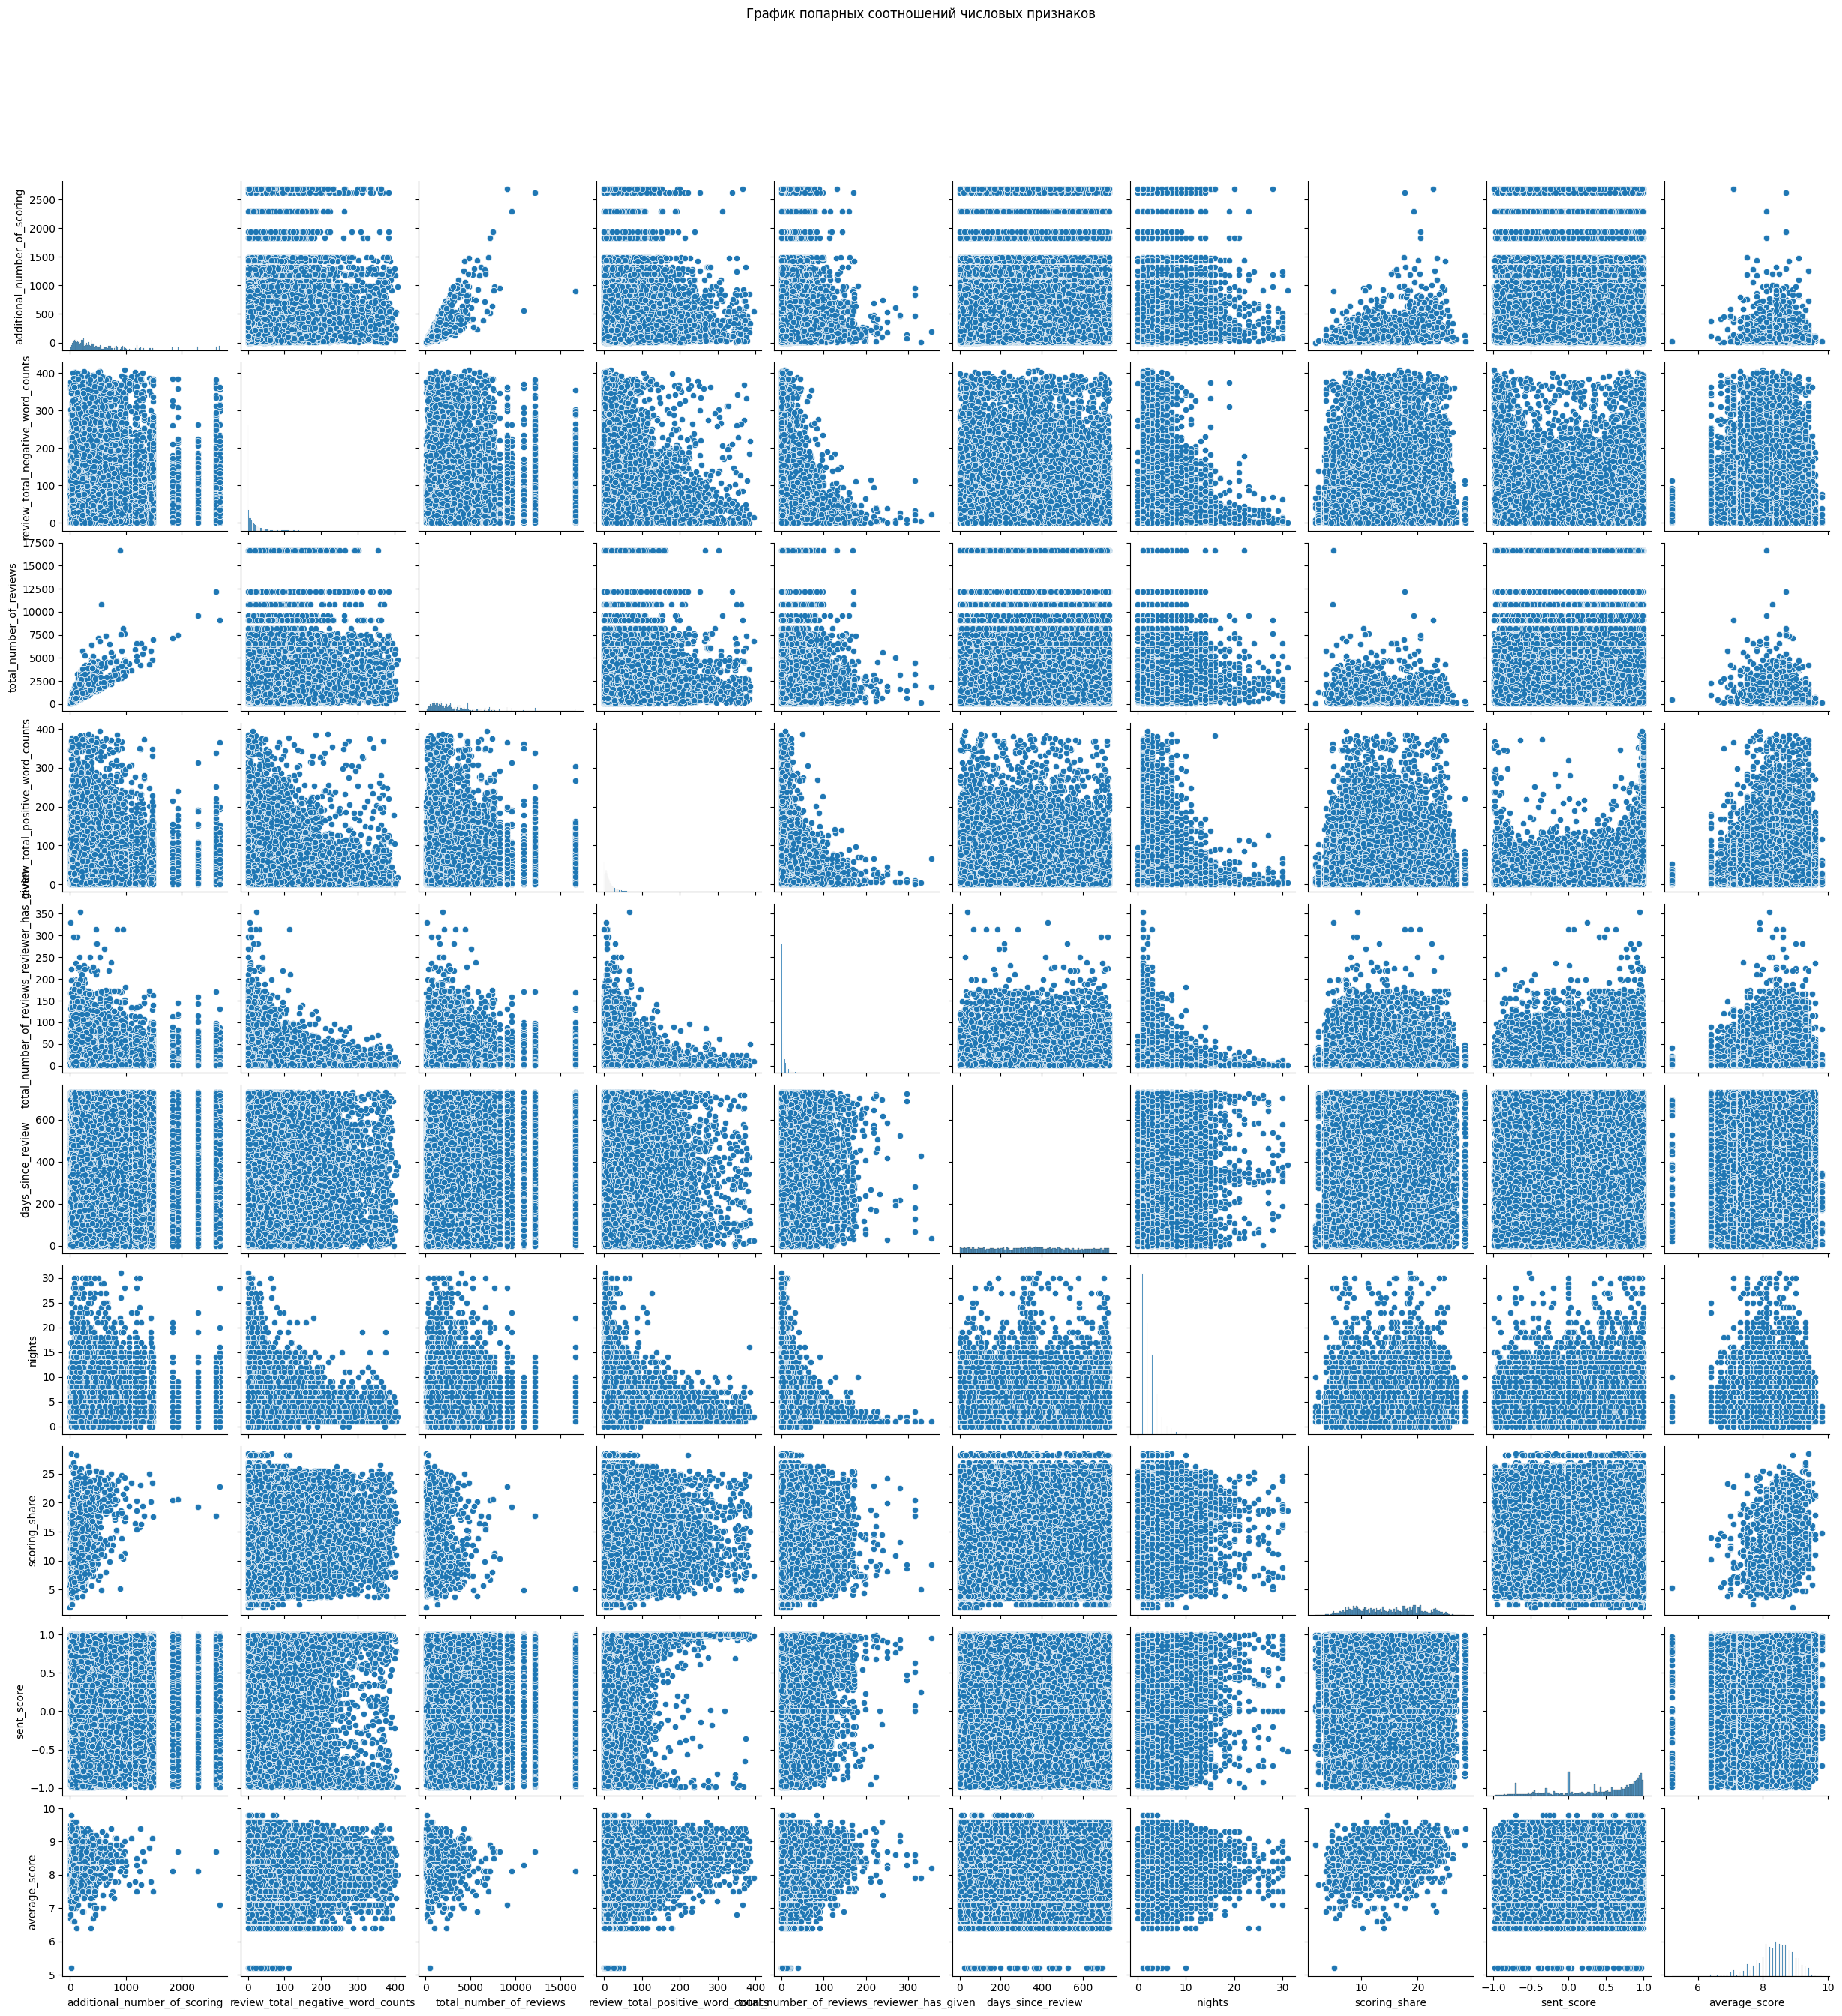

In [164]:
# ГРАФИК ПОПАРНЫХ ОТНОШЕНИЙ PAIRPLOT

g = sns.pairplot(data[num_cols])
g.figure.suptitle("График попарных соотношений числовых признаков", y=1.08) # y= some height>1
plt.show()

По графикам можно заметить, что распределение отлично от нормального и есть выбросы, которые нельзя исключать. Проведем нормализацию признаков по методу MinMaxScaler (выбор в пользу этого метода был сделан на основании результатов предсказаний модели).

In [165]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# Применяем MinMaxScaler только к выбранным столбцам
data[num_cols] = mm_scaler.fit_transform(data[num_cols])

# Отбор признаков

## Анализ мультиколлинеарности

Введём понятия силы связи между признаками:
* Отсутствие связи или очень слабая связь (0…+/- 0.3)
* Слабая связь (+/- 0.3…+/- 0.5)
* Средняя связь (+/- 0.5…+/- 0.7)
* Сильная связь (+/- 0.7…+/- 0.9)
* Очень сильная или абсолютная связь (+/- 0.9…+/-1)

In [166]:
# функция для выведения скоррелированных признаков

def corr_func(df):
    """Определяет силу связи признаков

    Args:
        df (DataFrame): Таблица коэффициентов корреляции

    Returns:
        _type_: признаки с их коэффициентом корреляции
    """
    
    result = dict() #словарь, в который будем заносить найденные значения
    
    for col in df:
        a = df[col]
        for i, j in enumerate(a):
            
            if ((float(j) < 1) and ((float(j) >= 0.9))) or ((float(j) > -1) and ((float(j) <= -0.9))): # условие для нахождения очень сильной связи
                pair = [df.iloc[i].index.to_list()[i], col, j]
                if 'Очень сильная связь' not in result:
                    result['Очень сильная связь'] = [pair]
                else: result['Очень сильная связь'].append(pair)

            if ((float(j) < 0.9) and ((float(j) >= 0.7))) or ((float(j) > -0.9) and ((float(j) <= -0.7))): # условие для нахождения сильной связи
                pair = [df.iloc[i].index.to_list()[i], col, j]
                if 'Cильная связь' not in result:
                    result['Cильная связь'] = [pair]
                else: result['Cильная связь'].append(pair)
             
            if ((float(j) < 0.7) and ((float(j) >= 0.5))) or ((float(j) > -0.7) and ((float(j) <= -0.5))): # условие для нахождения средней связи
                pair = [df.iloc[i].index.to_list()[i], col, j]
                if 'Средняя связь' not in result:
                    result['Средняя связь'] = [pair]
                else: result['Средняя связь'].append(pair)   
    display(result)

**Анализ мультиколлинеарности числовых признаков**

Проанализируем мультиколлинеарность числовых признаков. На предыдущем этапе была произведена нормализация данных, поэтому для вычислений вполне обоснованным будет применение метода Пирсона.

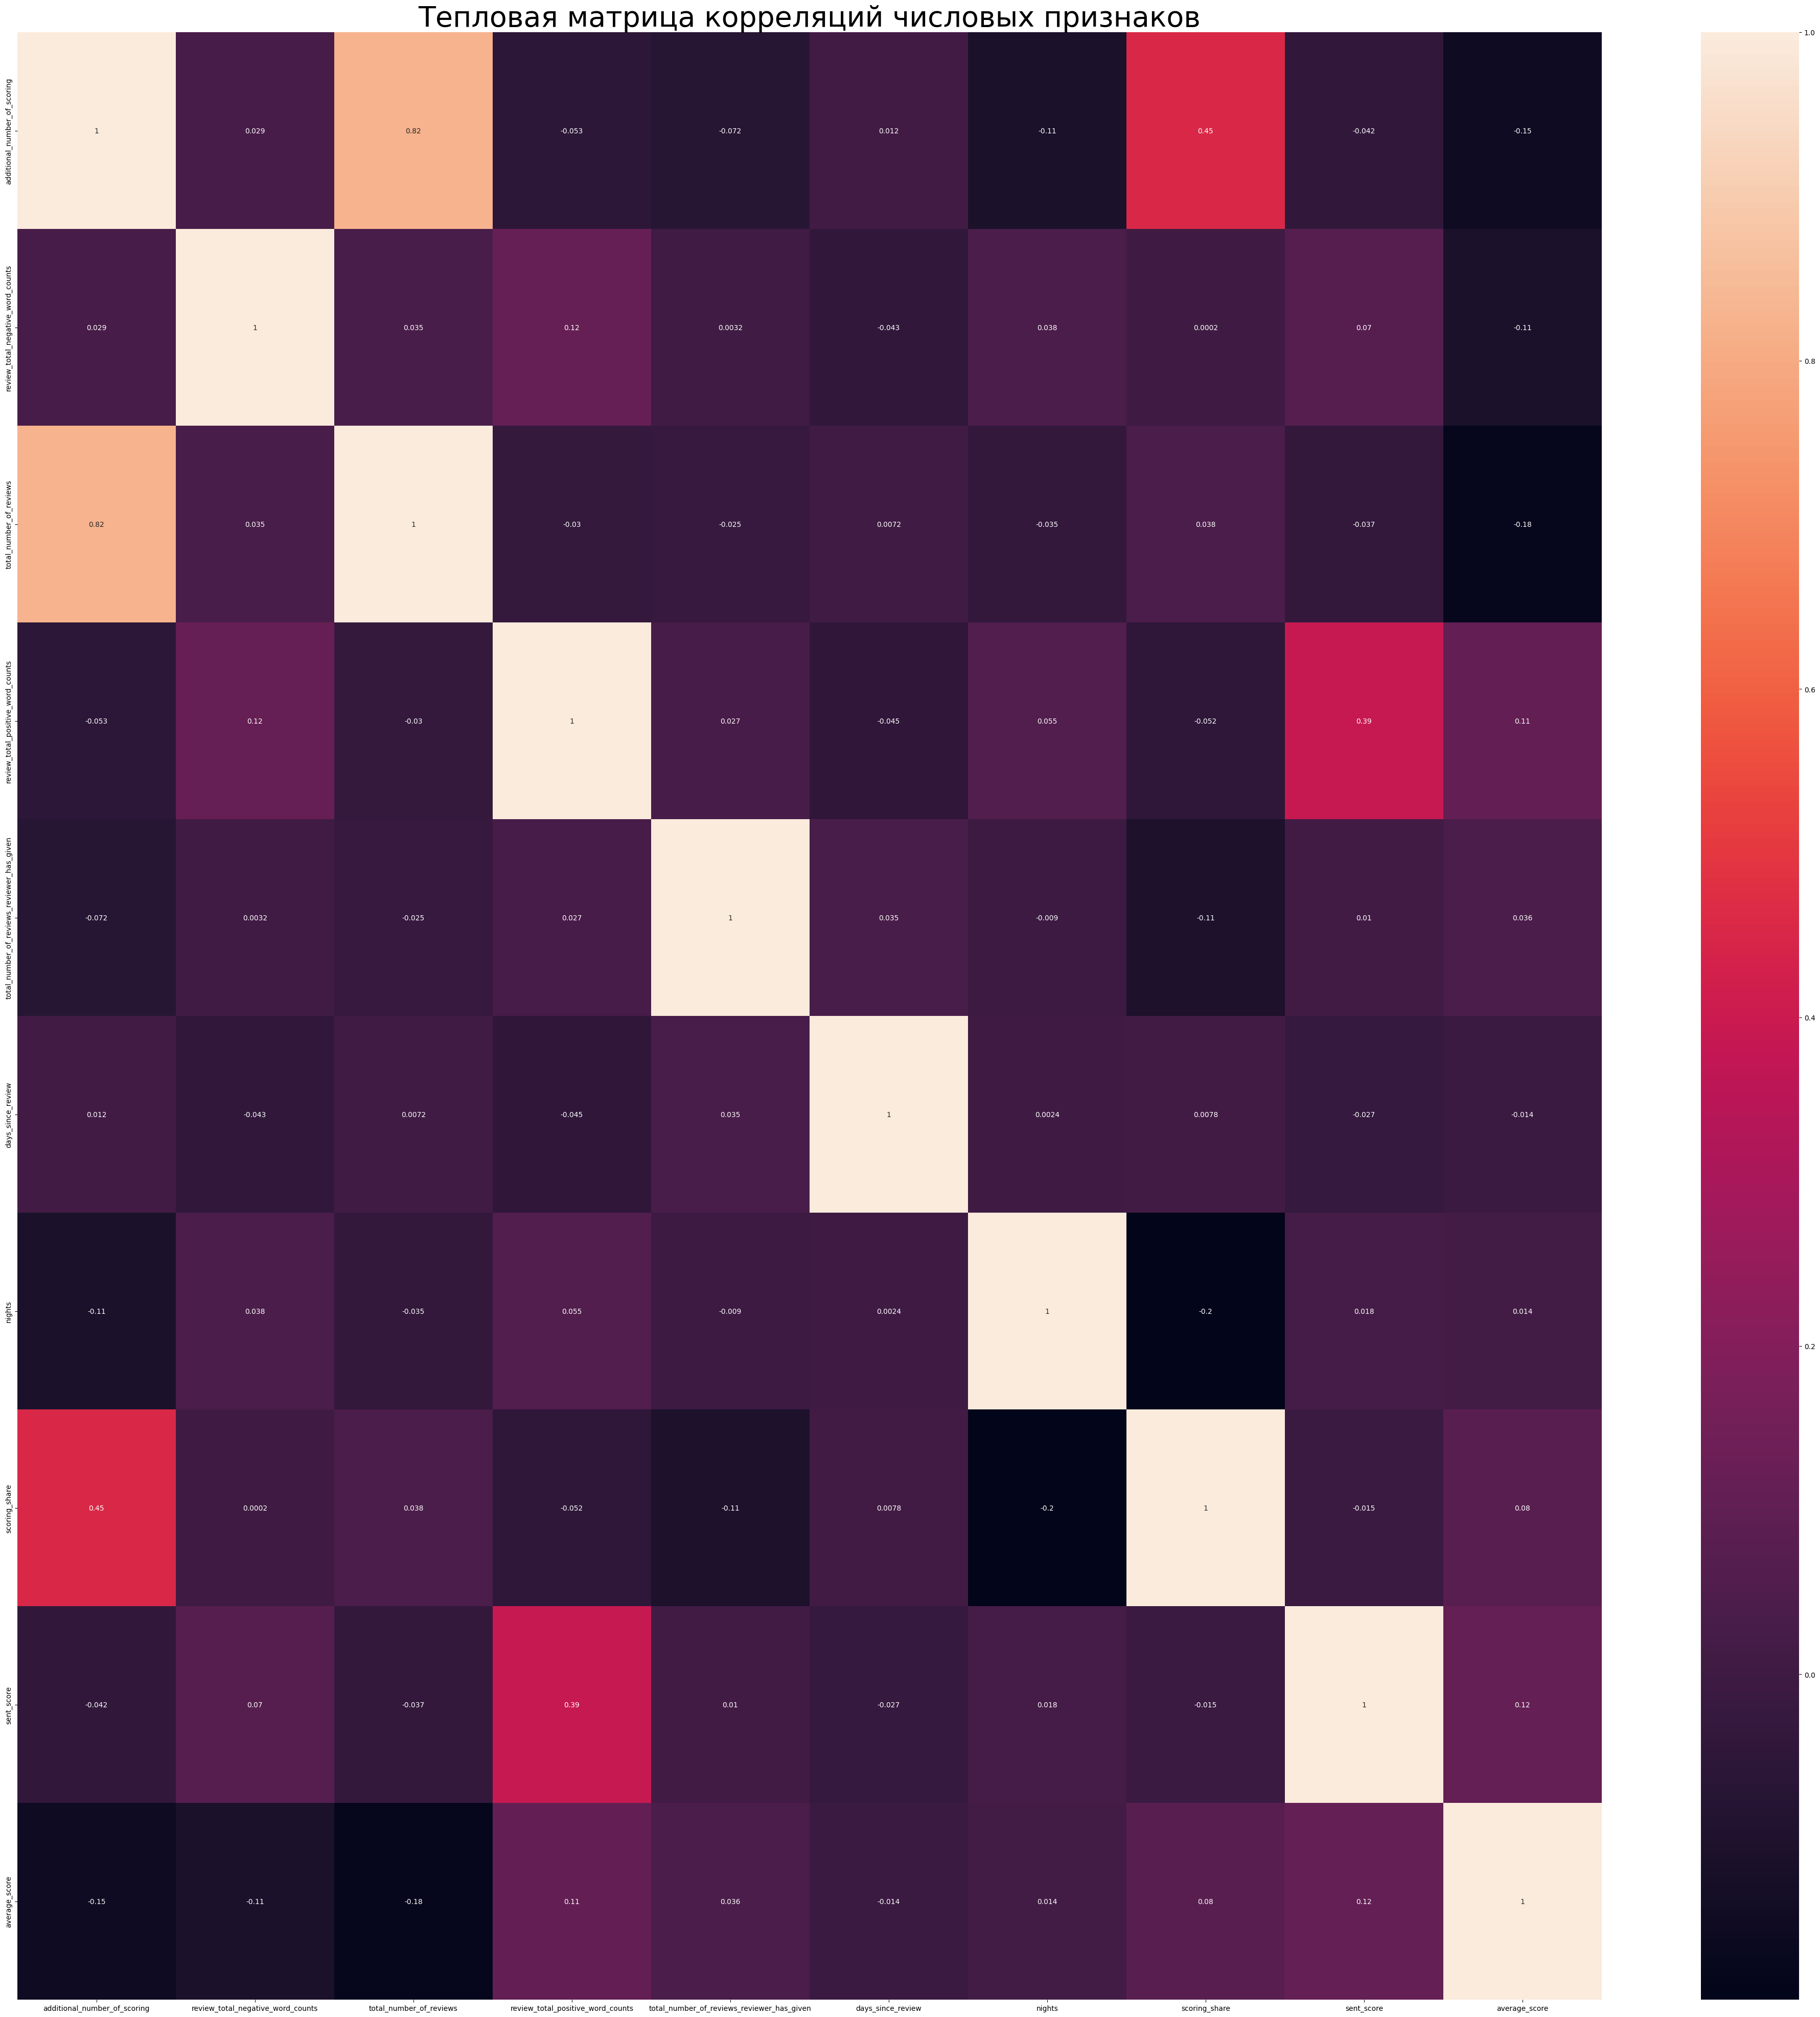

In [167]:
# Визуализация корреляции числовых признаков с помощью тепловой матрицы корреляций

# отсеиваем числовые признаки и включаем отображение коэффициентов
plt.rcParams['figure.figsize'] = (50,50)
sns.heatmap(data[num_cols].corr(), annot=True)
plt.title("Тепловая матрица корреляций числовых признаков", fontdict = {'fontsize' : 40})
plt.show() 

In [168]:
# рассчет корреляции по методу Пирсона
df = data[num_cols].corr(method='pearson')

# выведем признаки с сильной взаимосвязью
corr_func(df)

{'Cильная связь': [['total_number_of_reviews',
   'additional_number_of_scoring',
   0.8248837781012198],
  ['additional_number_of_scoring',
   'total_number_of_reviews',
   0.8248837781012198]]}

Cильная связь наблюдается только у одной пары признаков: 'total_number_of_reviews' и 'additional_number_of_scoring'. Удалим признак 'additional_number_of_scoring', поскольку отсутсвие отзыва не означает ложную оценку.

**Анализ мультиколлинеарности категориальных признаков**

Проанализируем мультиколлинеарность категориальных признаков, используя метод Спирмана.

In [169]:
# рассчет корреляции по методу Спирмана
df = data[cat_cols].corr(method = 'spearman')

# выведем признаки с сильной взаимосвязью
(corr_func(df))

{'Средняя связь': [['country_United Kingdom', 'foreigner', -0.651609443819522],
  ['roomtype_1', 'room_num', -0.5244182979474422],
  ['foreigner', 'country_United Kingdom', -0.651609443819522],
  ['residents_solo', 'trip_BT', 0.528577542600848],
  ['residents_solo', 'trip_LT', -0.5091187503008346],
  ['residents_solo', 'residents_couple', -0.5052590079066659],
  ['trip_BT', 'residents_solo', 0.528577542600848],
  ['trip_LT', 'residents_solo', -0.5091187503008346],
  ['residents_couple', 'residents_solo', -0.5052590079066659],
  ['reviewer_nationality_7', 'reviewer_nationality_5', -0.5379403871398668],
  ['reviewer_nationality_5', 'reviewer_nationality_7', -0.5379403871398668],
  ['room_num', 'roomtype_1', -0.5244182979474422]],
 'Очень сильная связь': [['trip_LT', 'trip_BT', -0.9040337997979822],
  ['trip_BT', 'trip_LT', -0.9040337997979822]]}

Можно удалить признак 'trip_LT', так как люди, останавливающиеся в отелях в одиночку, с одинаковой вероятностью ездят по делам или на отдых, более одного человека в основном останавливаются с целью отдыха.

In [170]:
# удаление признаков
data = data.drop(['trip_LT', 'additional_number_of_scoring'], axis=1)
num_cols.remove('additional_number_of_scoring')
cat_cols.remove('trip_LT')

## Отбор признаков на основе их важности

In [171]:
# выделим тренировочные данные для анализа степени влияния признаков на целевой столбец
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

**Отбор числовых признаков**

Для отбора числовых признаков на основе их важности будем проводить тест ANOVA.

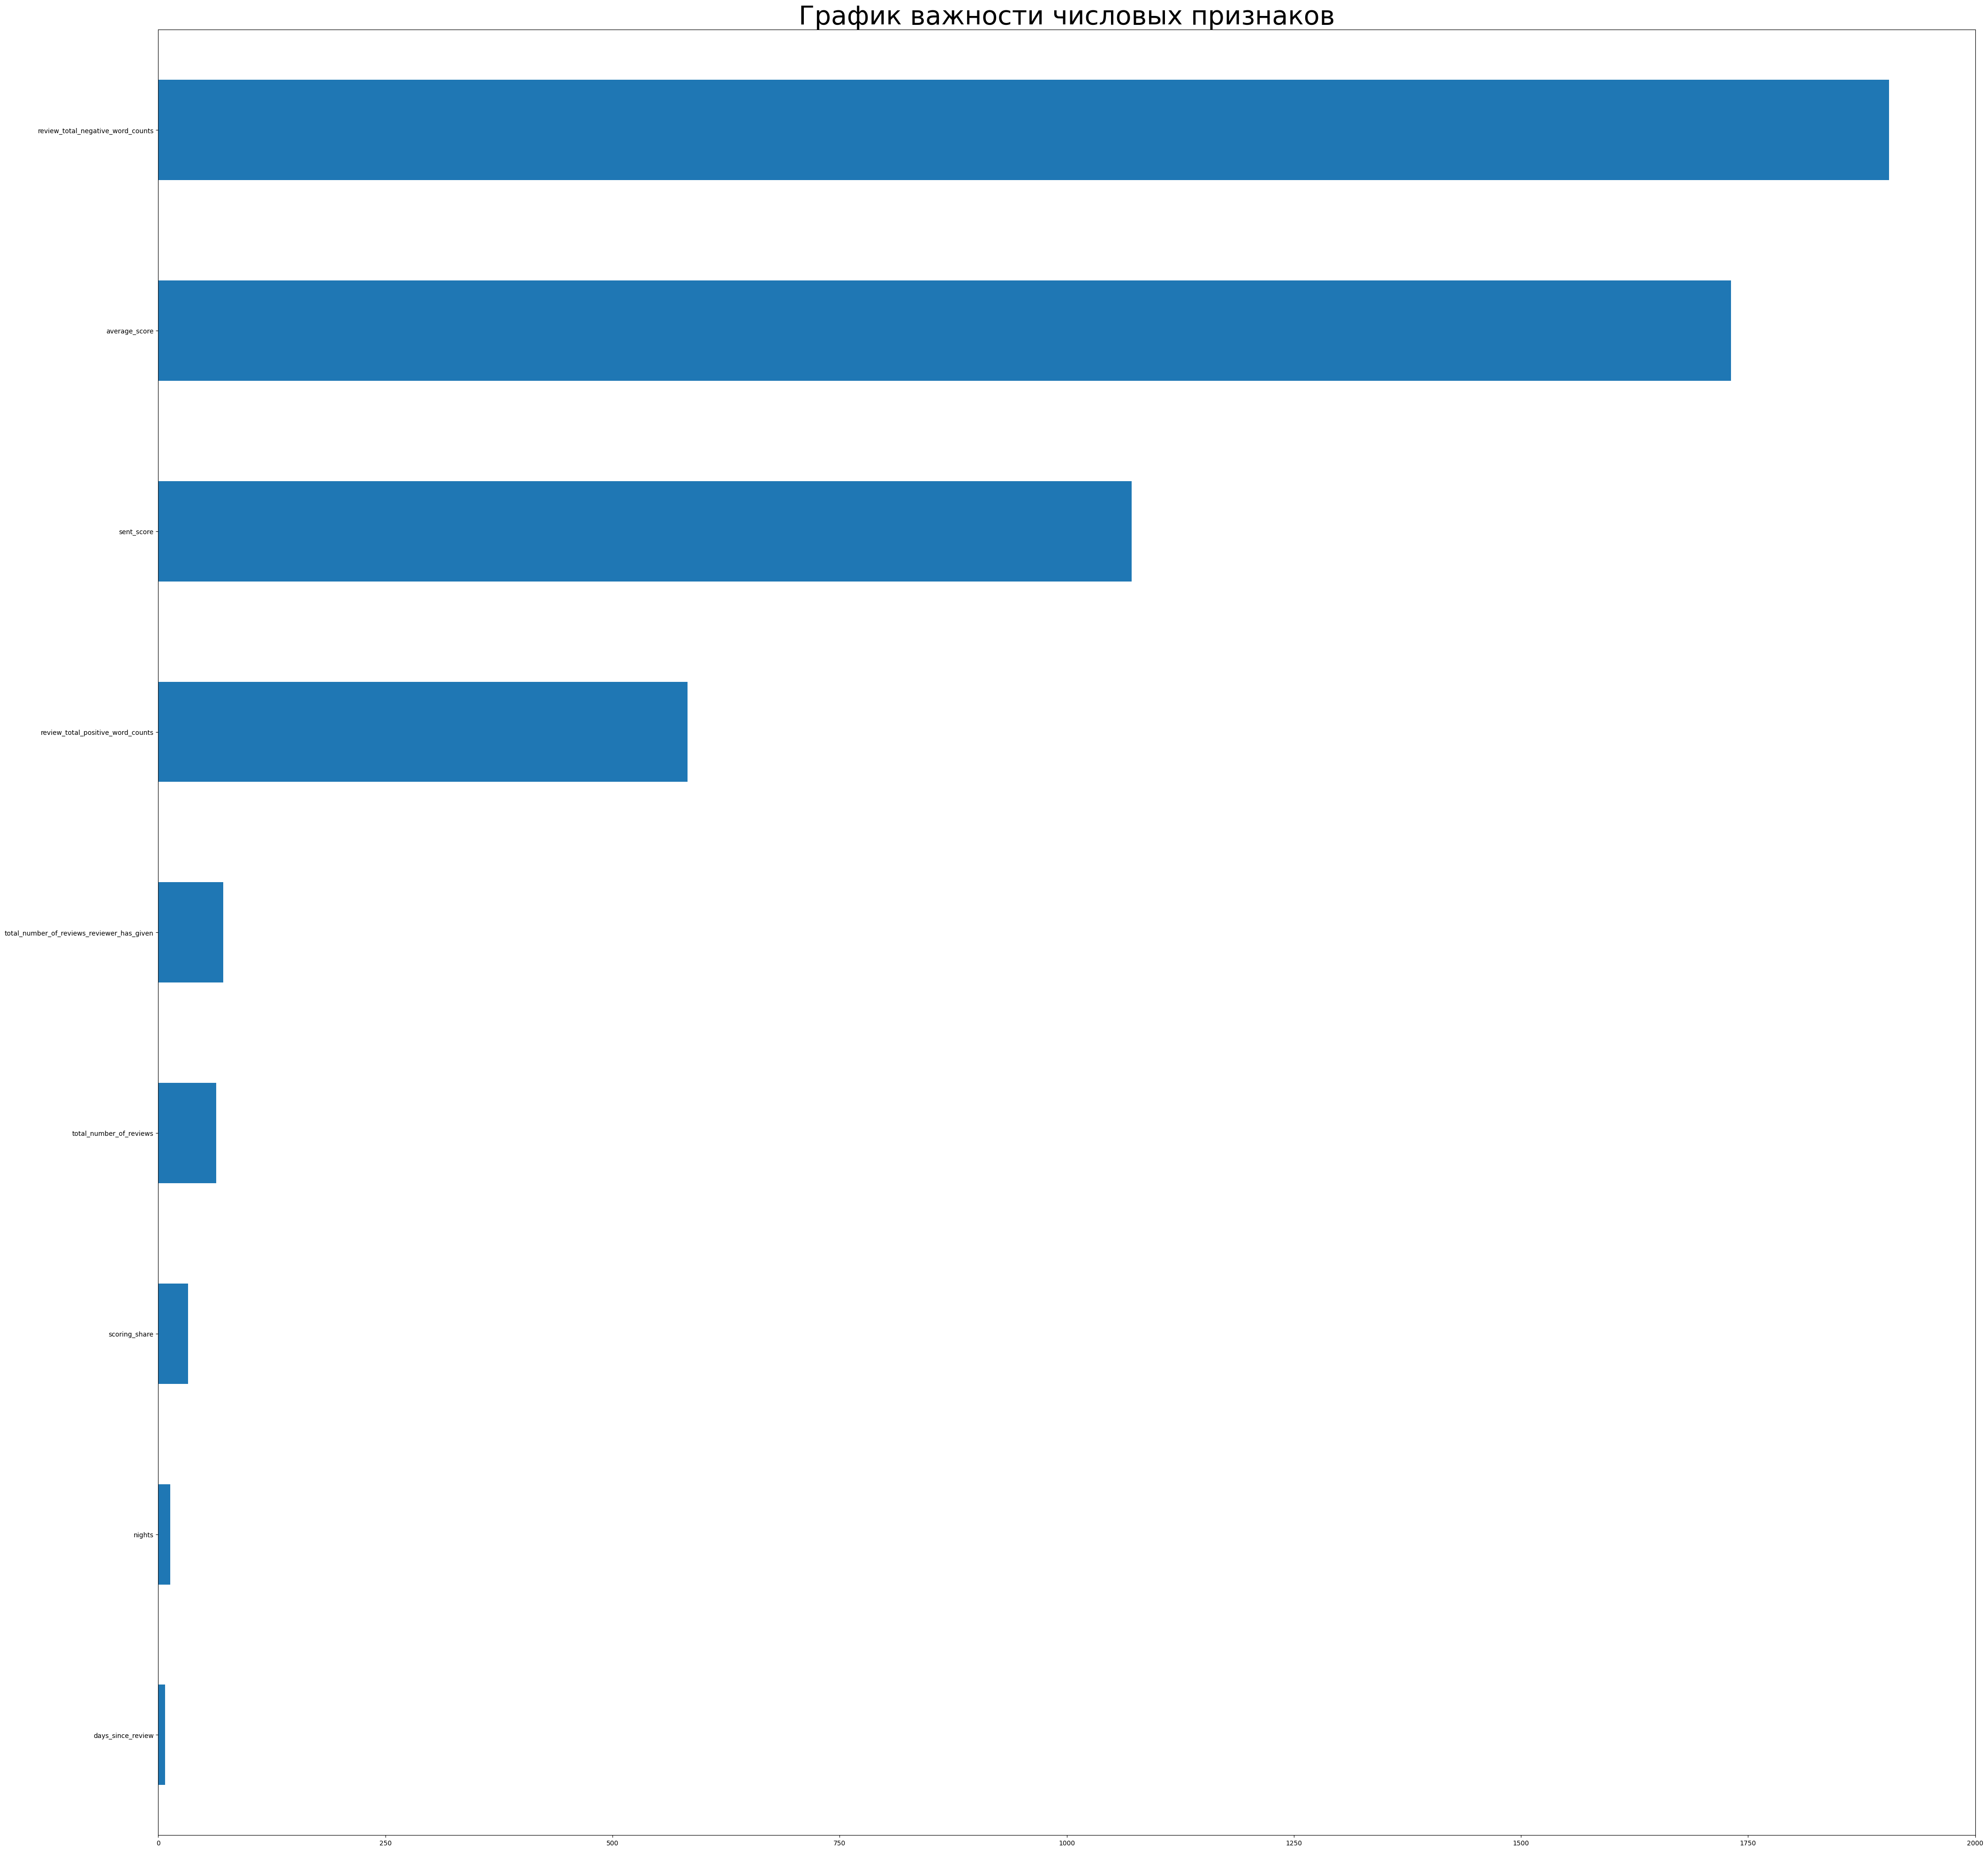

In [172]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')
plt.title("График важности числовых признаков", fontdict = {'fontsize' : 40})
plt.show()

Наибольшее влияние на рейтинг отеля оказывает 'review_total_negative_word_counts', наименьшее - 'days_since_review'. Удалению будут полежать признаки, оказывающие наименьшее влияние на рейтинг отелей: 'days_since_review', 'nights', 'scoring_share', 'total_number_of_reviews', 'total_number_of_reviews_reviewer_has_given'.

**Отбор категориальных признаков**

Для оценки значимости категориальных переменных будем использовать непараметрический тест хи-квадрат, реализованный в библиотеке sklearn.feature_selection.chi2. Метод возвращает массив значений хи-квадрат и p-value для каждого признака. Используем только значения хи-квадрат и выведем их на графике:

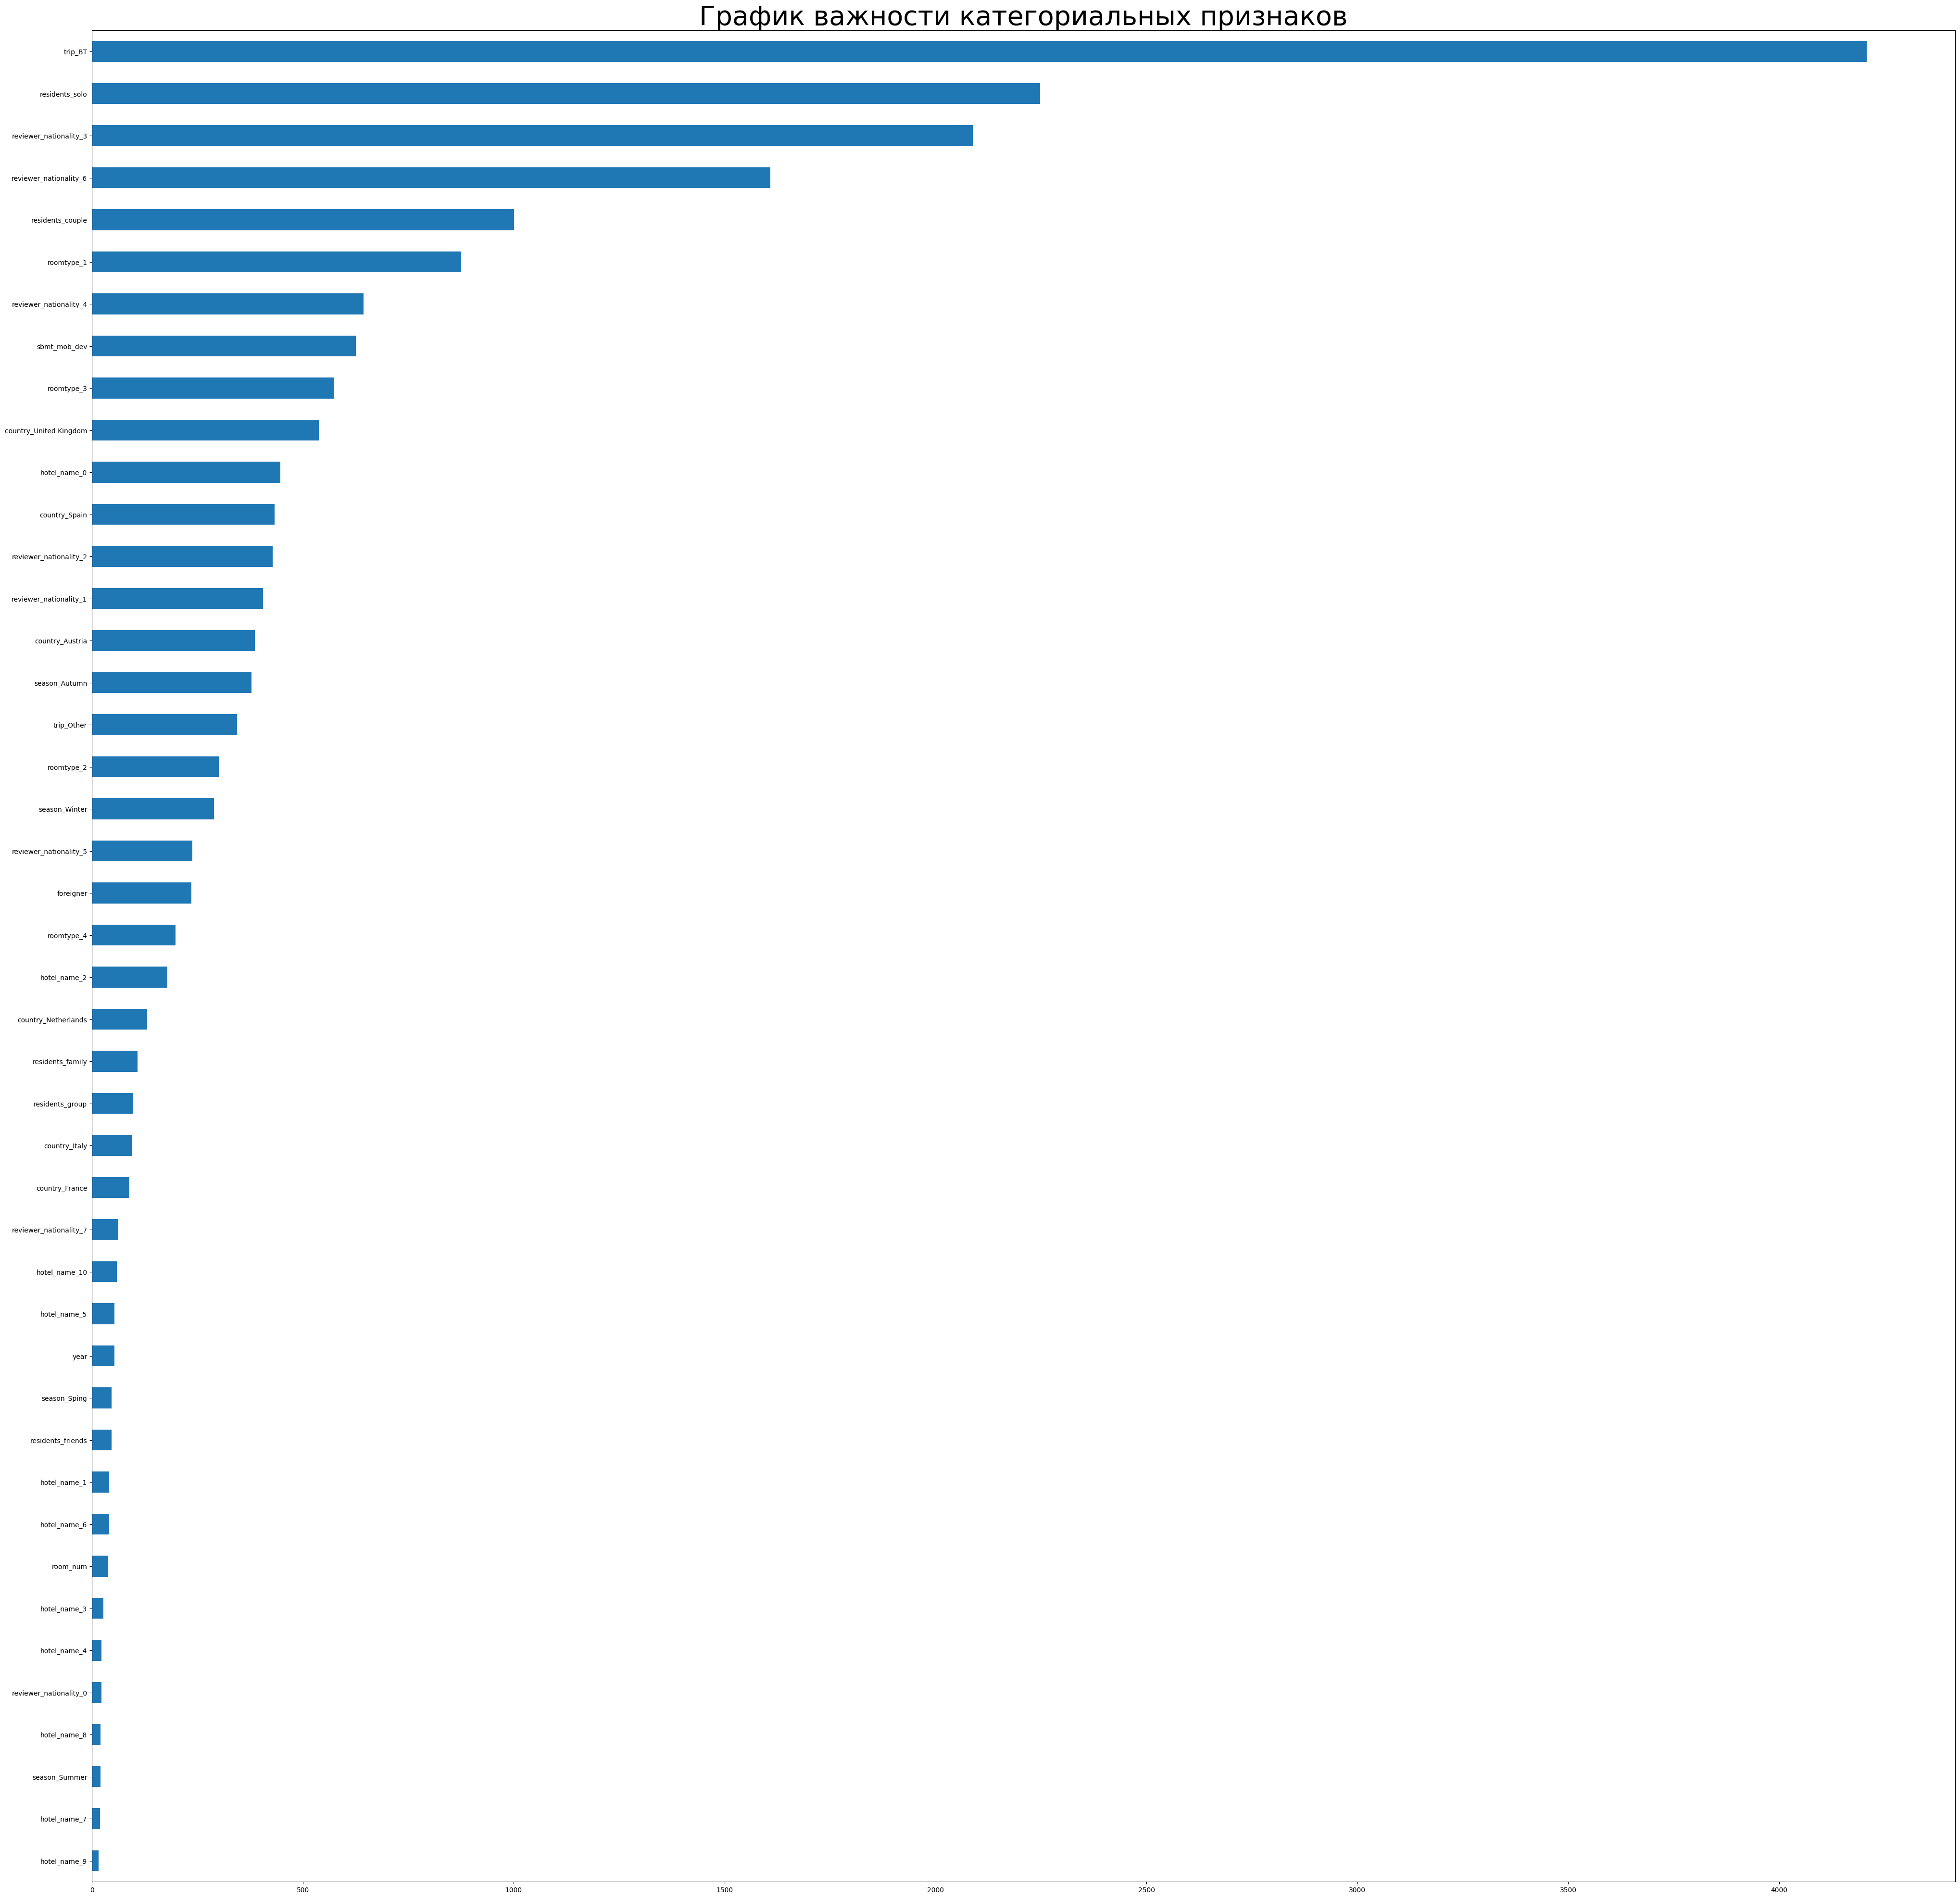

In [173]:
yc = y.astype('int') # столбец, для которого оцениваем значимость признаков
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], yc)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')
plt.title("График важности категориальных признаков", fontdict = {'fontsize' : 40})
plt.show()

По графику важности категориальных переменных мы можем понять, что признак 'trip_BT' имеет наибольшую важность в определении рейтинга отеля, 'hotel_name_8' - наименьшую.
Удалим признаки, оказывающие наименьшее влияние на рейтинг отелей: 'hotel_name_8', 'hotel_name_10', 'hotel_name_4', 'season_Summer', 'hotel_name_1', 'hotel_name_5', 'room_num', 'reviewer_nationality_0', 'hotel_name_3', 'residents_friends', 'season_Sping', 'year', 'hotel_name_7', 'country_France', 'country_Italy', 'residents_group', 'reviewer_nationality_3',  'residents_family', 'hotel_name_6',  'country_Netherlands', 'roomtype_4', 'foreigner', 'hotel_name_2', 'reviewer_nationality_6', 'season_Winter', 'roomtype_2', 'trip_Other', 'season_Autumn', 'country_Austria', 'reviewer_nationality_7', 'reviewer_nationality_1'.

In [174]:
# Удалим признаки с наименьшей значимостью для определения рейтинга отеля
data = data.drop(['days_since_review', 'nights', 'scoring_share', 'total_number_of_reviews', 
                  'total_number_of_reviews_reviewer_has_given', 
                  
                  'hotel_name_8', 'hotel_name_10', 'hotel_name_4', 'season_Summer', 'hotel_name_1', 
                  'hotel_name_5', 'room_num', 'reviewer_nationality_0', 'hotel_name_3', 'residents_friends', 
                  'season_Sping', 'year', 'hotel_name_7', 'country_France', 'country_Italy', 'residents_group', 
                  'reviewer_nationality_3',  'residents_family', 'hotel_name_6',  'country_Netherlands', 
                  'roomtype_4', 'foreigner', 'hotel_name_2', 'reviewer_nationality_6', 'season_Winter', 
                  'roomtype_2', 'trip_Other', 'season_Autumn', 'country_Austria', 'reviewer_nationality_7', 
                  'reviewer_nationality_1' ], axis=1)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   average_score                      515738 non-null  float64
 1   review_total_negative_word_counts  515738 non-null  float64
 2   review_total_positive_word_counts  515738 non-null  float64
 3   sample                             515738 non-null  int64  
 4   reviewer_score                     515738 non-null  float64
 5   sbmt_mob_dev                       515738 non-null  bool   
 6   sent_score                         515738 non-null  float64
 7   country_Spain                      515738 non-null  bool   
 8   country_United Kingdom             515738 non-null  bool   
 9   trip_BT                            515738 non-null  bool   
 10  residents_couple                   515738 non-null  bool   
 11  residents_solo                     5157

None

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   average_score                      515738 non-null  float64
 1   review_total_negative_word_counts  515738 non-null  float64
 2   review_total_positive_word_counts  515738 non-null  float64
 3   sample                             515738 non-null  int64  
 4   reviewer_score                     515738 non-null  float64
 5   sbmt_mob_dev                       515738 non-null  bool   
 6   sent_score                         515738 non-null  float64
 7   country_Spain                      515738 non-null  bool   
 8   country_United Kingdom             515738 non-null  bool   
 9   trip_BT                            515738 non-null  bool   
 10  residents_couple                   515738 non-null  bool   
 11  residents_solo                     5157

# Создание и обучение модели

In [176]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [177]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [178]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 18), (386803, 18), (386803, 17), (309442, 17), (77361, 17))

In [179]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [180]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [181]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished


In [182]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает 
#  среднюю абсолютную процентную ошибку предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.12906023515398032


<Axes: >

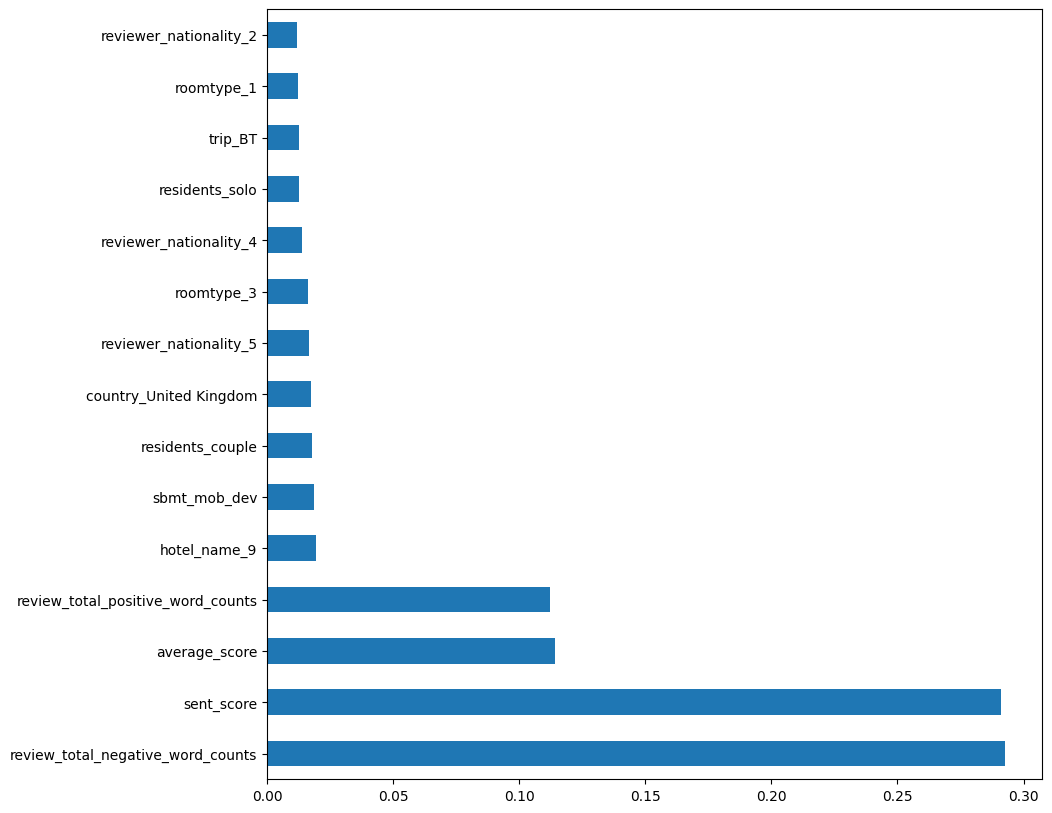

In [183]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [184]:
test_data.sample(10)

average_score  review_total_negative_word_counts  \
74403       0.739130                           0.056373   
2239        0.543478                           0.063725   
96462       0.739130                           0.000000   
28849       0.630435                           0.022059   
59377       0.695652                           0.061275   
73499       0.630435                           0.085784   
8937        0.782609                           0.004902   
69348       0.673913                           0.012255   
48949       0.652174                           0.053922   
42927       0.739130                           0.026961   

       review_total_positive_word_counts  reviewer_score  sbmt_mob_dev  \
74403                           0.068354             0.0         False   
2239                            0.075949             0.0         False   
96462                           0.010127             0.0         False   
28849                           0.007595             0.0         False   
59377                           0.025316             0.0          True   
73499                           0.108861             0.0         False   
8937                            0.162025             0.0          True   
69348                           0.007595             0.0          True   
48949                           0.000000             0.0          True   
42927                           0.007595             0.0          True   

       sent_score  country_Spain  country_United Kingdom  trip_BT  \
74403    0.955194          False                   False    False   
2239     0.883805          False                   False    False   
96462    0.351439           True                   False     True   
28849    0.361702          False                   False     True   
59377    0.863529          False                    True    False   
73499    0.792441           True                   False    False   
8937     0.967159          False                   False    False   
69348    0.499625          False                   False    False   
48949    0.669837          False                    True    False   
42927    0.932165          False                    True    False   

       residents_couple  residents_solo  roomtype_1  roomtype_3  hotel_name_0  \
74403             False           False       False       False             0   
2239              False           False       False       False             0   
96462             False            True       False       False             0   
28849             False            True       False       False             0   
59377             False           False        True       False             0   
73499              True           False       False       False             0   
8937              False           False       False        True             0   
69348              True           False        True       False             0   
48949              True           False       False        True             0   
42927             False            True       False       False             0   

       hotel_name_9  reviewer_nationality_2  reviewer_nationality_4  \
74403             1                       0                       0   
2239              0                       0                       1   
96462             0                       0                       0   
28849             0                       1                       0   
59377             0                       0                       0   
73499             0                       1                       0   
8937              0                       0                       0   
69348             1                       1                       0   
48949             0                       0                       0   
42927             0                       0                       0   

       reviewer_nationality_5  
74403                       1  
2239                        0  
96462       

In [185]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [186]:
sample_submission

reviewer_score      id
0                    1  488440
1                   10  274649
2                    3  374688
3                   10  404352
4                    9  451596
...                ...     ...
128930               7  495812
128931               1  315577
128932               3  511968
128933               6  303386
128934               5  103157

[128935 rows x 2 columns]

In [187]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.4s finished


In [188]:
predict_submission

array([8.853 , 7.3805, 8.507 , ..., 8.375 , 9.51  , 6.964 ])

In [189]:
list(sample_submission)

['reviewer_score', 'id']

In [190]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

reviewer_score      id
0          8.8530  488440
1          7.3805  274649
2          8.5070  374688
3          9.5480  404352
4          9.6930  451596
5          8.5920  302161
6          7.9360  317079
7          7.5610   13963
8          8.0700  159785
9          8.1480  195089

# Итоги
В результате проведённых исследований, преобразования и отбора признаков была построена модель, которая предсказывает рейтинг отеля. С её помощью путём сравнения результатов предсказания с фактическим рейтингом можно будет выявить отели, которые, возможно, накручивают себе рейтинг. Признак "review_total_negative_word_counts" оказался наиболее значимым для итоговой оценки. Метрика точности предсказания MAPE меньше 13%, что говорит о довольно точных результатах.

С проектом можно ознакомиться на платформе Kaggl по ссылке: (https://www.kaggle.com/code/zlatam/dst-project3-hotels)